# 1. Import Data & Libraries

In [7]:
import pandas as pd
import numpy as np

# Clustering Algorithms
from sklearn.cluster import DBSCAN, MeanShift, KMeans, \
    AgglomerativeClustering, estimate_bandwidth

# Visualisations
import matplotlib.pyplot as plt

# External Functions File
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [2]:
df = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', 
                 sep = ';', index_col = 'ID')
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


In [3]:
## TEMP

# Scalers
from sklearn.preprocessing import RobustScaler, StandardScaler, \
                                  MinMaxScaler

df = df.dropna()
df.drop(['Nationality', 'NameHash', 'DocIDHash', 'DistributionChannel',
          'MarketSegment'], 
        axis = 1, inplace = True)

scaled_data = MinMaxScaler().fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=df.columns, 
                           index=df.index)

In [4]:
scaled_data

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,
1,0.466165,0.299481,0.101868,0.020791,0.009290,0.066667,0.0,0.026316,0.051724,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,1.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.533835,1.000000,0.159593,0.017088,0.006773,0.000000,0.0,0.013158,0.086207,0.043103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.466165,1.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.488722,1.000000,0.100170,0.016376,0.002709,0.000000,0.0,0.013158,0.034483,0.017241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,0.308271,0.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111730,0.398496,0.000000,0.290323,0.053774,0.002258,0.000000,0.0,0.013158,0.086207,0.043103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111731,0.353383,0.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# 2. Clustering

## 2.1 Hierarchical Clustering

In [ ]:
agg_clust = AgglomerativeClustering().fit(scaled_data)

In [22]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

NameError: name 'plt' is not defined

**Final Model for HC**

In [ ]:
linkage = 'complete'
distance = 'manhattan'
n_clusters = 2

hclust = AgglomerativeClustering(linkage=linkage, 
                                 metric=distance, 
                                 n_clusters=n_clusters)

hc_labels = hclust.fit_predict(scaled_data)

In [ ]:
f.cluster_profiling(df, hc_labels, "Hierarchical")

## 2.2 K-Means

In [5]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

**Elbow Method**

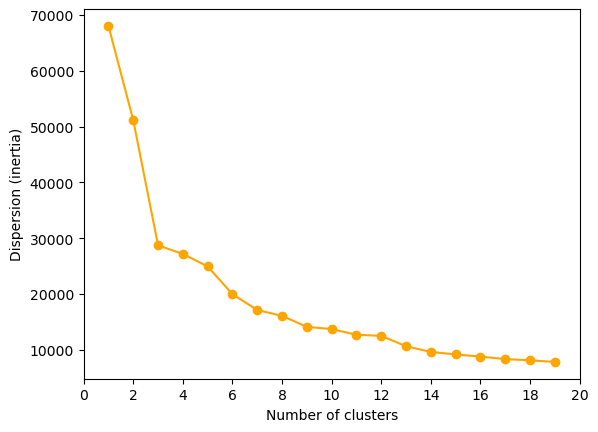

In [9]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

**Final Model for KM**

In [10]:
kmclust = KMeans(n_clusters = 3)

km_labels = kmclust.fit_predict(scaled_data)

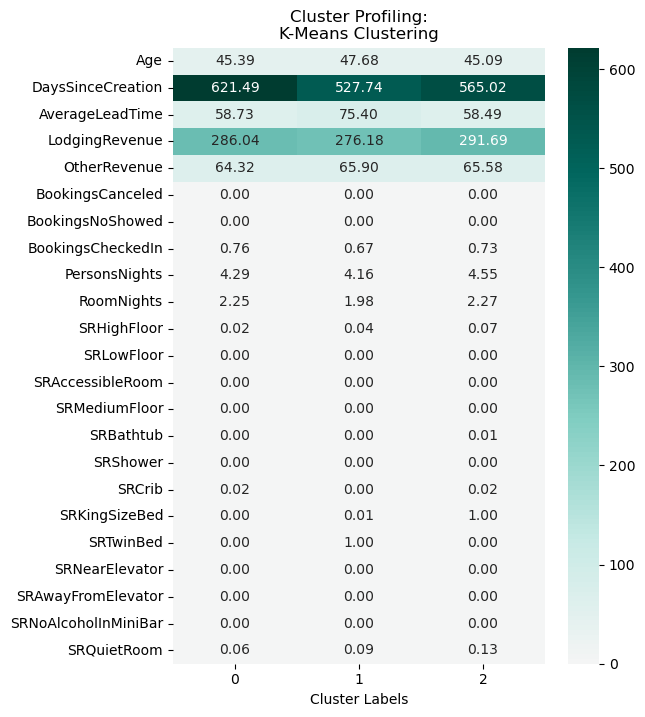

In [15]:
cluster_profiling(df, km_labels, "K-Means")

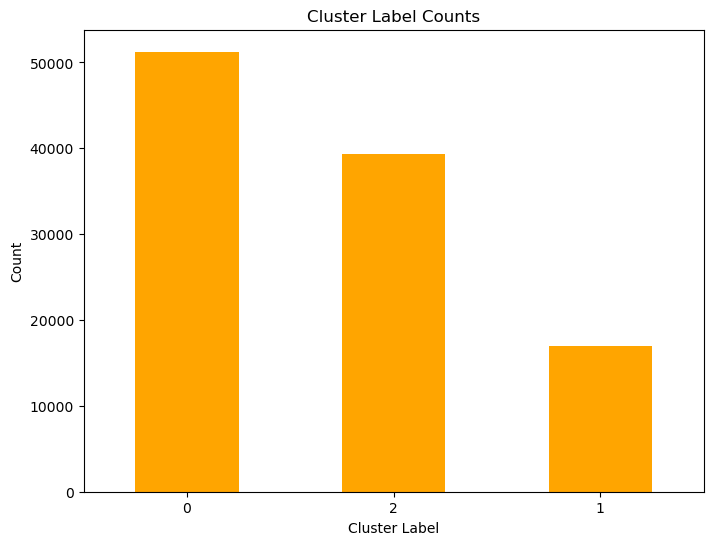

In [21]:
plot_counts(km_labels)